### IS727272 - Cordero Hernández, Marco Ricardo

# DT_2 Bike Sharing hourly, comparing Regression algorithms

Instrucciones:  
1. Construir el algoritmo de GD de Regresión lineal
2. Regresión lineal con la librería
3. Regresión DT
4. Comparar resultados

## 1. Regresión lineal con GD  
## 1.1 Lectura del dataset, normalizar datos, agregar columna de 1's y dividir los datos en entrenamiento y prueba

In [1]:
# Leer el dataset
import pandas as pd
import numpy as np

dataset = pd.read_csv('./Datasets/hourly-1.csv')
dataset.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [2]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [3]:
# Convertir dataset a matrices numpy X y Y
data = np.array(dataset)
X = data[:, 2:-1]
y = data[:, -1]
y = y.reshape(-1, 1)

print(X.shape, y.shape)

(17379, 14) (17379, 1)


In [4]:
# Normalizar X
from sklearn.preprocessing import normalize

X_norm = normalize(X)
print(X_norm)

[[0.06776017 0.         0.06776017 ... 0.         0.2032805  0.88088217]
 [0.0297645  0.         0.0297645  ... 0.         0.23811604 0.95246416]
 [0.03540488 0.         0.03540488 ... 0.         0.1770244  0.95593174]
 ...
 [0.01152511 0.01152511 0.13830135 ... 0.00189242 0.08067579 0.95658433]
 [0.01794181 0.01794181 0.21530168 ... 0.00240958 0.23324348 0.86120671]
 [0.02136098 0.02136098 0.25633171 ... 0.00286878 0.25633171 0.7903561 ]]


In [5]:
# Add ones
X1 = np.concatenate((np.ones((len(X_norm), 1)), X_norm), axis = 1)
print(X1.shape)

(17379, 15)


In [6]:
# Split dataset
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X1, y, test_size = 0.3, random_state = 0)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(12165, 15) (12165, 1)
(5214, 15) (5214, 1)


### 1.2 Gradient Descente Algorithm

In [7]:
import matplotlib.pyplot as plt

# Initialize W
m, n = np.shape(X_train)
initw = np.random.rand(1, n)
print(initw)

# Función de gradiente
def gradient(X, Y, W):
    residual = Y - np.dot(X, W.T) # Salida - Predicción
    grad = -2 * np.dot(X.T, residual)
    return grad

# Función de costo
def mse(Y, Yt):
    m = len(Y)
    residual = Y- Yt
    cost = (1 / m) * (np.dot(residual.T, residual))
    return cost

# Gradiente descendete
def GD(X, Y, W, alpha, iterations):
    it = 0
    J = []
    
    while it < iterations:
        grad = gradient(X, Y, W)
        W = W - np.dot(alpha, grad.T)
        Yt = np.dot(X, W.T)
        costo = mse(Y, Yt)
        J.append(costo)
        
        it += 1
    
    return W, it, J

[[0.25716103 0.38314758 0.5949711  0.95047878 0.29415943 0.45023515
  0.41479247 0.45503689 0.55203315 0.48371094 0.01708485 0.61966525
  0.59366816 0.47137187 0.06625693]]


W: [[141.50023409473076 -80.60565638364211 -17.79124082087134
  -190.9198241760711 -232.98246890242385 -1.5164596567369228
  -115.59882671014525 -24.848713750963192 -61.786082406680904
  -16.727742511009176 -16.796904041307016 -28.247147111378393
  -6.578589987880712 129.53762480315328 111.17800612089162]]


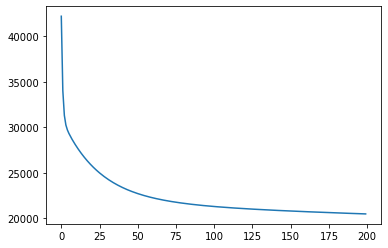

In [8]:
# Testing de GD
w, iterations, J = GD(X_train, y_train, initw, 0.00001, 200)
J = np.array(J).reshape(-1, 1)
print('W:', w)
plt.plot(J)

yt = np.dot(X_train, w.T) # Predicción
yt_Te = np.dot(X_test, w.T)
costoTR = mse(y_train, yt)
costoTE = mse(y_test, yt_Te)

In [9]:
from sklearn.metrics import r2_score

r2_tr = r2_score(y_train, yt)
r2_te = r2_score(y_test, yt_Te)

# Crear listas para guardar valores de R2 de cada algoritmo
R2_train = []
R2_test = []

R2_train.append(r2_tr)
R2_test.append(r2_te)

print('MSE final Training:', costoTR)
print('MSE final Testing:', costoTE)
print('R2 final Training:', r2_tr)
print('R2 final Testing:', r2_te)

MSE final Training: [[20473.46116276295]]
MSE final Testing: [[20931.99205904996]]
R2 final Training: 0.37655806156703064
R2 final Testing: 0.36645849658202834


## 2. Regresión con librería

In [10]:
from sklearn.linear_model import LinearRegression
X_train, X_test, y_train, y_test = train_test_split(X_norm, y, test_size = 0.3, random_state = 0)
reg = LinearRegression().fit(X_train, y_train)

costo1 = reg.score(X_train, y_train)
costo2 = reg.score(X_test, y_test)

R2_train.append(costo1)
R2_test.append(costo2)

print('Error (R2) Train:', costo1)
print('Error (R2) Test:', costo2)

Error (R2) Train: 0.5378835112508444
Error (R2) Test: 0.5307625368622304


## 3. Decision Tree Regression

In [11]:
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree

# dtreg = DecisionTreeRegressor(max_depth = 5)
dtreg = DecisionTreeRegressor()
DT_reg = dtreg.fit(X_train, y_train)

# fig = plt.figure(figsize = (25, 20))
# tree.plot_tree(DT_reg)
# plt.show

In [12]:
costo1dt = DT_reg.score(X_train, y_train)
costo2dt = DT_reg.score(X_test, y_test)

print('Error (R2) Train:', costo1dt)
print('Error (R2) Test:', costo2dt)

R2_train.append(costo1dt)
R2_test.append(costo2dt)

Error (R2) Train: 1.0
Error (R2) Test: 0.9930127782382235


## 4. Comparing R2 Score

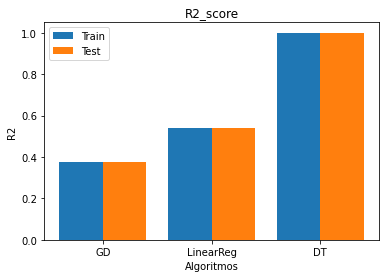

In [13]:
XX = ['GD', 'LinearReg', 'DT']
X_axis = np.arange(len(XX))
plt.bar(X_axis - 0.2, R2_train, 0.4, label = 'Train')
plt.bar(X_axis + 0.2, R2_train, 0.4, label = 'Test')

plt.xticks(X_axis, XX)
plt.xlabel('Algoritmos')
plt.ylabel('R2')
plt.title('R2_score')
plt.legend()
plt.show()